# Maps of highest diagnosis rates

In [559]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [560]:
diabetes_rates_test = pd.read_csv('us_county_diabetes_rates.csv')
diabetes_rates_test['CountyFIPS'] = diabetes_rates_test['CountyFIPS'].astype(str)
# percentage, lower limit, upper limit of adults aged 20+ diagnosed with diabetes 
# data as of 2021 -- all counties except all of Florida and 8 other counties have 'No Data'
# going to impute previous year (2020) for 2021 data for all missing counties -- have already done it for Florida but not the 8 counties


In [561]:
diabetes_rates_test = diabetes_rates_test.replace('No Data', np.nan)

# Since the csv encodes null values as No Data, replacing with nan so they are easier to find using isnan()


#diabetes_rates_test[(diabetes_rates_test['no_percentage'] == True) & (diabetes_rates_test['State'] == 'Florida')] # all counties of florida are null


In [562]:
florida_diabetes_2020 = pd.read_csv('flo_2020_diabetes.csv')
florida_diabetes_2020['CountyFIPS'] = florida_diabetes_2020['CountyFIPS'].astype(str)

# flo['Percentage'] = flo['Percentage'].astype(float)
# flo['Lower Limit'] = flo['Lower Limit'].astype(float)
# flo['Upper Limit'] = flo['Upper Limit'].astype(float)


In [621]:
no_nans = diabetes_rates_test.dropna(subset='Percentage').reset_index(drop = True)
count_info_small = pd.read_csv('county_info_small.csv')
# dropped any counties that don't have percentage, UL, LL
count_info_small

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,2018,2019,2021,2022,2023
0,"""01000""",Alabama,5,CAINC30,60,...,Income maintenance benefits 1/,Thousands of dollars,4450549,4632658,8181283,9246833,5923059
1,"""01000""",Alabama,5,CAINC30,70,...,Unemployment insurance compensation,Thousands of dollars,171165,169307,1409499,79954,83126
2,"""01000""",Alabama,5,CAINC30,80,...,Retirement and other,Thousands of dollars,42904679,45398401,60692725,55655784,60537417
3,"""01000""",Alabama,5,CAINC30,90,...,"Dividends, interest, and rent 2/",Thousands of dollars,36450100,38353121,44062052,46467249,51025653
4,"""01000""",Alabama,5,CAINC30,100,...,Population (persons) 3/,Number of persons,4977088,5003778,5050380,5073903,5108468
...,...,...,...,...,...,...,...,...,...,...,...,...,...
73385,"""56045""","Weston, WY",7,CAINC30,201,...,Employer contributions for employee pension...,Thousands of dollars,29360,28725,27503,28822,30438
73386,"""56045""","Weston, WY",7,CAINC30,202,...,Employer contributions for government socia...,Thousands of dollars,9534,10143,10350,11047,11584
73387,"""56045""","Weston, WY",7,CAINC30,210,...,Proprietors' income,Thousands of dollars,16312,12692,21692,22998,22029
73388,"""56045""","Weston, WY",7,CAINC30,220,...,Farm proprietors' income,Thousands of dollars,-4255,-3896,-2976,1315,-655


In [564]:
with_florida = pd.concat([no_nans, florida_diabetes_2020]).reset_index(drop = True)
with_florida 

# with_florida csv is all counties that have percentage, LL, and UL values (NOT including the 8 counties that don't have data -- will account for this later)


,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit
0,Teton County,Wyoming,56039,4.4,3.1,6
1,Gallatin County,Montana,30031,4.7,3.5,6
2,San Juan County,Washington,53055,4.7,3.2,6.1
3,Summit County,Colorado,8117,5.1,3.5,7.2
4,Blaine County,Idaho,16013,5.1,3.6,7
...,...,...,...,...,...,...
3138,Lafayette County,Florida,12067,9.3,6.5,12.5
3139,Lake County,Florida,12069,11.0,9.0,13.4
3140,Lee County,Florida,12071,7.6,6.1,9.2
3141,Leon County,Florida,12073,8.3,6.3,10.5


In [565]:
with_florida['Percentage'] = with_florida['Percentage'].astype(float)
with_florida['Lower Limit'] = with_florida['Lower Limit'].astype(float)
with_florida['Upper Limit'] = with_florida[' Upper Limit'].astype(float)

# Percentage is originally type 'str', converted to float so that they can be plotted

In [566]:
# add the county pop file
county_info = pd.read_csv('county_info.csv')
county_info
## only want population information
count_pop = county_info[county_info["LineCode"] == 100]
count_pop.head()

/var/folders/vk/kfflzmxs1ssf_t7swsphkgd00000gn/T/ipykernel_22815/2687889602.py:2: DtypeWarning: Columns (2,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  county_info = pd.read_csv('county_info.csv')


,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1969,1970,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
7,"""00000""",United States,,CAINC30,100.0,...,Population (persons) 3/,Number of persons,201298000,203798722,...,319257560,321815121,324353340,326608609,328529577,330226227,331526933,332048977,333271411,334914895
30,"""01000""",Alabama,5,CAINC30,100.0,...,Population (persons) 3/,Number of persons,3440000,3449846,...,4887757,4909177,4931579,4953096,4977088,5003778,5031864,5050380,5073903,5108468
53,"""01001""","Autauga, AL",5,CAINC30,100.0,...,Population (persons) 3/,Number of persons,25166,24606,...,56062,56311,56979,57393,57747,58251,58915,59203,59726,60342
76,"""01003""","Baldwin, AL",5,CAINC30,100.0,...,Population (persons) 3/,Number of persons,56951,59474,...,200910,205083,210148,215475,221187,227057,233227,239439,246531,253507
99,"""01005""","Barbour, AL",5,CAINC30,100.0,...,Population (persons) 3/,Number of persons,23818,22655,...,27012,26600,26186,25585,25359,25187,24969,24533,24700,24585


In [567]:
#want to add the population for 2021 for these values then 2020 for the other vals (NA)
count_pop_21 = count_pop[['GeoName','2021']]
count_pop_21
count_pop_20 = count_pop[['GeoName','2020']]
count_pop_20

,GeoName,2020
7,United States,331526933
30,Alabama,5031864
53,"Autauga, AL",58915
76,"Baldwin, AL",233227
99,"Barbour, AL",24969
...,...,...
73492,Plains,21624720
73515,Southeast,85429296
73538,Southwest,42504766
73561,Rocky Mountain,12583415


In [568]:
## need to filter and make sure only states so can merge
has_rate_state = no_nans.groupby('State').first().reset_index()['State']
has_2021 = count_pop_21[count_pop_21['GeoName'].isin(has_rate_state)]
has_2021


,GeoName,2021
30,Alabama,5050380
1594,Alaska,734923
2882,Arizona,7272487
3250,Arkansas,3028443
4998,California,39145060
6355,Colorado,5811596
7850,Connecticut,3603691
8057,Delaware,1004881
8149,District of Columbia,669037
9759,Georgia,10790385


In [569]:
#now make the table for the 2020 values (the missing vals)
#Florida 2020 diagnosis
florida_rate_state = diabetes_rates_test[diabetes_rates_test['State'] == 'Florida']
florida_rate_state
has_20 = count_pop_20[count_pop_20['GeoName']== 'Florida']
has_20
full_df = pd.concat([has_2021, has_20]).reset_index(drop = True)
full_df

full_df['Total_Population'] = full_df['2021'].combine_first(full_df['2020'])

# Drop the old columns
full_df = full_df.drop(columns=['2021', '2020'])
full_df

,GeoName,Total_Population
0,Alabama,5050380
1,Alaska,734923
2,Arizona,7272487
3,Arkansas,3028443
4,California,39145060
5,Colorado,5811596
6,Connecticut,3603691
7,Delaware,1004881
8,District of Columbia,669037
9,Georgia,10790385


In [570]:
#columns for each table
with_florida.columns

Index(['County', 'State', 'CountyFIPS', 'Percentage', 'Lower Limit',
       ' Upper Limit', 'Upper Limit'],
      dtype='object')

In [571]:
count_pop.columns

Index(['GeoFIPS', 'GeoName', 'Region', 'TableName', 'LineCode',
       'IndustryClassification', 'Description', 'Unit', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [572]:
county_info.columns

Index(['GeoFIPS', 'GeoName', 'Region', 'TableName', 'LineCode',
       'IndustryClassification', 'Description', 'Unit', '1969', '1970', '1971',
       '1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980',
       '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023'],
      dtype='object')

In [573]:
us_states = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}


In [574]:
# #has county
# has = count_pop_21[count_pop_21['GeoName'].str.contains(',', na=False)].reset_index(drop=True)
# hast = has['GeoName'].str.rsplit(',',n = 1, expand = True).apply(lambda col: col.str.strip())
# has['County'] = hast[0].str.split('+')
# has['State'] = [us_states[s.replace('*', '')] for s in hast[1]]
# has

# #has['County'] = hast[0].str.split('+')

# has = has.explode('County')

# has

In [575]:
# with_florida['clean_county'] = with_florida['County'].str.replace('County','')
# with_florida['cleaner_county'] = with_florida['clean_county'].str.replace('City','')

# has['cleaner_county'] = has['County'].str.replace('\([^)]*\)','', regex=True)
# has

# n = has[has['State'] == 'Florida']
# len(with_florida), len(has), len(n), len(with_florida) - len(has)
# has

In [576]:
# has['cleaner_county'] = has['cleaner_county'].astype(str)
# with_florida['cleaner_county'] = with_florida['cleaner_county'].astype(str)

# # with_florida.drop(columns=['County', 'clean_county'], inplace=True)
# # has.drop(columns=['County'], inplace=True)

# has[has['County Clean'] == 'Sweetwater']
# with_florida[with_florida['State'] == 'Wyoming']
# #has.join(with_florida, on='cleaner_county')
# type(has['cleaner_county'][0]),type(with_florida['cleaner_county'][0])
# print(has.dtypes['cleaner_county'])          # should say object
# print(with_florida.dtypes['cleaner_county'])
# merged = has.merge(with_florida, on='cleaner_county', how='left')
# merged
# merged[merged.isna().any(axis=1)]
# #with_florida[with_florida.isna().any(axis=1)]
# with_florida[with_florida['State'] == 'Alabama']
# with_florida.columns
# #has.drop(columns=['County'], inplace=True)


In [577]:
has

,GeoName,2021,County,State,cleaner_county
0,"Autauga, AL",59203,Autauga,Alabama,Autauga
1,"Baldwin, AL",239439,Baldwin,Alabama,Baldwin
2,"Barbour, AL",24533,Barbour,Alabama,Barbour
3,"Bibb, AL",22359,Bibb,Alabama,Bibb
4,"Blount, AL",59079,Blount,Alabama,Blount
...,...,...,...,...,...
3135,"Sweetwater, WY",41626,Sweetwater,Wyoming,Sweetwater
3136,"Teton, WY",23605,Teton,Wyoming,Teton
3137,"Uinta, WY",20681,Uinta,Wyoming,Uinta
3138,"Washakie, WY",7719,Washakie,Wyoming,Washakie


In [578]:
with_florida

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit,Upper Limit
0,Teton County,Wyoming,56039,4.4,3.1,6,6.0
1,Gallatin County,Montana,30031,4.7,3.5,6,6.0
2,San Juan County,Washington,53055,4.7,3.2,6.1,6.1
3,Summit County,Colorado,8117,5.1,3.5,7.2,7.2
4,Blaine County,Idaho,16013,5.1,3.6,7,7.0
...,...,...,...,...,...,...,...
3138,Lafayette County,Florida,12067,9.3,6.5,12.5,12.5
3139,Lake County,Florida,12069,11.0,9.0,13.4,13.4
3140,Lee County,Florida,12071,7.6,6.1,9.2,9.2
3141,Leon County,Florida,12073,8.3,6.3,10.5,10.5


# Lets Try again

In [579]:
## Clean up text in both county_info and diabetes rates

dr = with_florida.copy()
count = county_info.copy()

In [620]:
count = county_info.copy()
# Keep columns of interest and filter to just get populations
count = count[count["LineCode"] == 100]
count = count[['GeoFIPS', 'GeoName', 'Region',
       '2020', '2021', '2022', '2023']]

#get only county info filter more
count = count[count['GeoName'].str.contains(',', na=False)].reset_index(drop=True)

#clean up string to get populations
mid = count['GeoName'].str.rsplit(',',n = 1, expand = True).apply(lambda col: col.str.strip())
#count['GeoName'] = mid[0].str.split('+')
#count['State'] = [us_states[s.replace('*', '')] for s in mid[1]]



count = count.explode('GeoName')
count['County'] = count['GeoName'].astype(str)
count
count[count['County'].str.contains('\+', na = False)]

,GeoFIPS,GeoName,Region,2020,2021,2022,2023,County
575,"""15901""","Maui + Kalawao, HI*",8,164848,164878,164440,164264,"Maui + Kalawao, HI*"
2927,"""51901""","Albemarle + Charlottesville, VA*",5.0,158979,159628,160117,160659,"Albemarle + Charlottesville, VA*"
2928,"""51903""","Alleghany + Covington, VA*",5.0,20925,20704,20348,20140,"Alleghany + Covington, VA*"
2929,"""51907""","Augusta, Staunton + Waynesboro, VA*",5.0,125665,126059,126678,127344,"Augusta, Staunton + Waynesboro, VA*"
2930,"""51911""","Campbell + Lynchburg, VA*",5.0,134618,134458,134293,134805,"Campbell + Lynchburg, VA*"
2931,"""51913""","Carroll + Galax, VA*",5.0,35863,35751,35820,35956,"Carroll + Galax, VA*"
2932,"""51918""","Dinwiddie, Colonial Heights + Petersburg, VA*",5.0,79476,79633,79839,80045,"Dinwiddie, Colonial Heights + Petersburg, VA*"
2933,"""51919""","Fairfax, Fairfax City + Falls Church, VA*",5.0,1187485,1181072,1178550,1181707,"Fairfax, Fairfax City + Falls Church, VA*"
2934,"""51921""","Frederick + Winchester, VA*",5.0,119883,122051,122669,123611,"Frederick + Winchester, VA*"
2935,"""51923""","Greensville + Emporia, VA*",5.0,17093,17051,16737,16596,"Greensville + Emporia, VA*"


In [582]:
dr = with_florida.copy()
# dr.columns
# dr['County'] = dr['cleaner_county'].astype(str)
dr = dr[['County','State', 'CountyFIPS', 'Percentage', 'Lower Limit', 'Upper Limit']]
dr

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit
0,Teton County,Wyoming,56039,4.4,3.1,6.0
1,Gallatin County,Montana,30031,4.7,3.5,6.0
2,San Juan County,Washington,53055,4.7,3.2,6.1
3,Summit County,Colorado,8117,5.1,3.5,7.2
4,Blaine County,Idaho,16013,5.1,3.6,7.0
...,...,...,...,...,...,...
3138,Lafayette County,Florida,12067,9.3,6.5,12.5
3139,Lake County,Florida,12069,11.0,9.0,13.4
3140,Lee County,Florida,12071,7.6,6.1,9.2
3141,Leon County,Florida,12073,8.3,6.3,10.5


In [583]:
#set index?
r = dr.copy().set_index('County')

dr = dr.set_index('County')

count = count.set_index('County')

In [ ]:
# #join both of them count > dr
# dr = dr.drop(columns = ['State'])


In [585]:
# together = pd.merge(dr,count, on = 'County',how = 'left')
# together
# # together[together.isna().any(axis=1)]
# d = dr.reset_index()

# together
# together = together.reset_index()
# together[together['County'] == 'Autauga']
# together[together['State'] == 'Alabama']
# count.index

In [586]:
# needs to be stripped 
stripped_dr = dr.reset_index()
stripped_dr['County'] = stripped_dr['County'].astype(str).str.strip()
stripped_dr = stripped_dr.set_index('County')

together = pd.merge(stripped_dr,count, on = 'County', how = 'inner')

together = together.reset_index()
len(stripped_dr['CountyFIPS'].unique()),len(count['GeoFIPS'].unique())


(3143, 3140)

In [587]:
len(stripped_dr['CountyFIPS']),len(count['GeoFIPS'])

(3143, 3164)

In [588]:
count[count.duplicated('GeoFIPS',keep = False)]
c = county_info[county_info["LineCode"] == 100]
c[c.duplicated('GeoFIPS',keep = False)]
len(c),len(with_florida)
c = c[c['GeoName'].str.contains(',', na=False)].reset_index(drop=True)

len(c),len(with_florida)
c[c['GeoName'].str.contains('\+', na=False)]
count[count['State'] == 'Virginia']


,GeoFIPS,GeoName,Region,2020,2021,2022,2023,State
County,,,,,,,,
Accomack,"""51001""",Accomack,5.0,33392,33410,33223,33239,Virginia
Amelia,"""51007""",Amelia,5.0,13267,13306,13368,13480,Virginia
Amherst,"""51009""",Amherst,5.0,31312,31385,31472,31396,Virginia
Appomattox,"""51011""",Appomattox,5.0,16154,16398,16703,16864,Virginia
Arlington,"""51013""",Arlington,5.0,238814,233436,233678,234162,Virginia
...,...,...,...,...,...,...,...,...
Bristol,"""51953""",Bristol,5.0,71194,70800,70795,70857,Virginia
Wise,"""51955""",Wise,5.0,39745,39313,38916,38666,Virginia
Norton,"""51955""",Norton,5.0,39745,39313,38916,38666,Virginia


In [589]:
with_florida.head()
with_florida[with_florida['State'] == 'Virginia'].sort_values('County')

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit,Upper Limit
2542,Accomack County,Virginia,51001,9.9,6.9,12.8,12.8
1098,Albemarle County,Virginia,51003,7.7,5.6,10.1,10.1
787,Alexandria City,Virginia,51510,7.4,5.4,9.4,9.4
2328,Alleghany County,Virginia,51005,9.4,6.5,12.8,12.8
2580,Amelia County,Virginia,51007,10.0,6.7,13.4,13.4
...,...,...,...,...,...,...,...
906,Williamsburg City,Virginia,51830,7.5,4.8,11.2,11.2
699,Winchester City,Virginia,51840,7.3,4.6,11.6,11.6
2840,Wise County,Virginia,51195,11.0,8.2,14.7,14.7
1757,Wythe County,Virginia,51197,8.5,5.8,12.1,12.1


In [591]:
# count['GeoName'] = count['GeoName'].astype(str).str.strip()
# with_florida['cleaner_county'] = with_florida['cleaner_county'].astype(str).str.strip()

# b = set(count[count['State'] == 'Virginia']['GeoName']) - set(with_florida[with_florida['State'] == 'Virginia']['cleaner_county'])
# b

In [ ]:
count[count['GeoName'] == 'Charles City']
with_florida[with_florida['cleaner_county'] == 'Charles']

,County,State,CountyFIPS,Percentage,Lower Limit,Upper Limit,Upper Limit,clean_county,cleaner_county
2180,Charles City County,Virginia,51036,9.1,6.0,13.2,13.2,Charles City,Charles
2943,Charles County,Maryland,24017,11.7,10.1,13.3,13.3,Charles,Charles


In [595]:
count['FIPS'] = count['GeoFIPS'].astype(str).str.zfill(5)
count['FIPS'] = count['FIPS'].str.replace('"', '')
count['FIPS'] = count['FIPS'].astype(str).str.strip()

with_florida['FIPS'] = with_florida['CountyFIPS'].astype(str).str.zfill(5)

In [605]:
len(count), len(with_florida)
#pd.merge(with_florida,count, on = 'FIPS')
with_florida
together = pd.merge(with_florida,count, on = 'FIPS')
official = together[['County','State_x', 'FIPS','Percentage','Lower Limit','Upper Limit','Upper Limit','Region','2020','2021','2022','2023']]
official

,County,State_x,FIPS,Percentage,Lower Limit,Upper Limit,Upper Limit,Region,2020,2021,2022,2023
0,Teton County,Wyoming,56039,4.4,3.1,6.0,6.0,7.0,23379,23605,23297,23232
1,Gallatin County,Montana,30031,4.7,3.5,6.0,6.0,7,119597,123098,124938,126409
2,San Juan County,Washington,53055,4.7,3.2,6.1,6.1,8.0,17826,18618,18672,18566
3,Summit County,Colorado,08117,5.1,3.5,7.2,7.2,7,31001,30998,30636,30465
4,Blaine County,Idaho,16013,5.1,3.6,7.0,7.0,7,24348,24782,24901,25041
...,...,...,...,...,...,...,...,...,...,...,...,...
3085,Lafayette County,Florida,12067,9.3,6.5,12.5,12.5,5,8218,7952,7777,8078
3086,Lake County,Florida,12069,11.0,9.0,13.4,13.4,5,386216,396352,410090,424462
3087,Lee County,Florida,12071,7.6,6.1,9.2,9.2,5,765547,790888,822391,834573
3088,Leon County,Florida,12073,8.3,6.3,10.5,10.5,5,293955,296007,297282,296913


In [628]:
official['Percentage'] = official['Percentage'].astype(float)
official['2021'] = pd.to_numeric(official['2021'], errors='coerce')

state_rates = official.groupby('State_x').apply(
    lambda g: (g['Percentage'] * g['2021']).sum() / g['2021'].sum()
).reset_index(name='WeightedRate')

state_rates

# Reverse the dictionary to get full name → abbreviation
state_name_to_abbrev = {v: k for k, v in us_states.items()}

# Add abbreviation column to state_rates
state_rates['State Abbrev'] = state_rates['State_x'].map(state_name_to_abbrev)
state_rates

/var/folders/vk/kfflzmxs1ssf_t7swsphkgd00000gn/T/ipykernel_22815/3780574417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  official['Percentage'] = official['Percentage'].astype(float)
/var/folders/vk/kfflzmxs1ssf_t7swsphkgd00000gn/T/ipykernel_22815/3780574417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  official['2021'] = pd.to_numeric(official['2021'], errors='coerce')
/var/folders/vk/kfflzmxs1ssf_t7swsphkgd00000gn/T/ipykernel_22815/3780574417.py:4: DeprecationWarning: DataFrameGroupBy.apply o

,State_x,WeightedRate,State Abbrev
0,Alabama,10.884629,AL
1,Alaska,7.658332,AK
2,Arizona,8.639518,AZ
3,Arkansas,9.675171,AR
4,California,8.995669,CA
5,Colorado,6.803508,CO
6,Connecticut,8.070455,CT
7,Delaware,10.035857,DE
8,District of Columbia,7.900000,DC
9,Florida,9.065219,FL


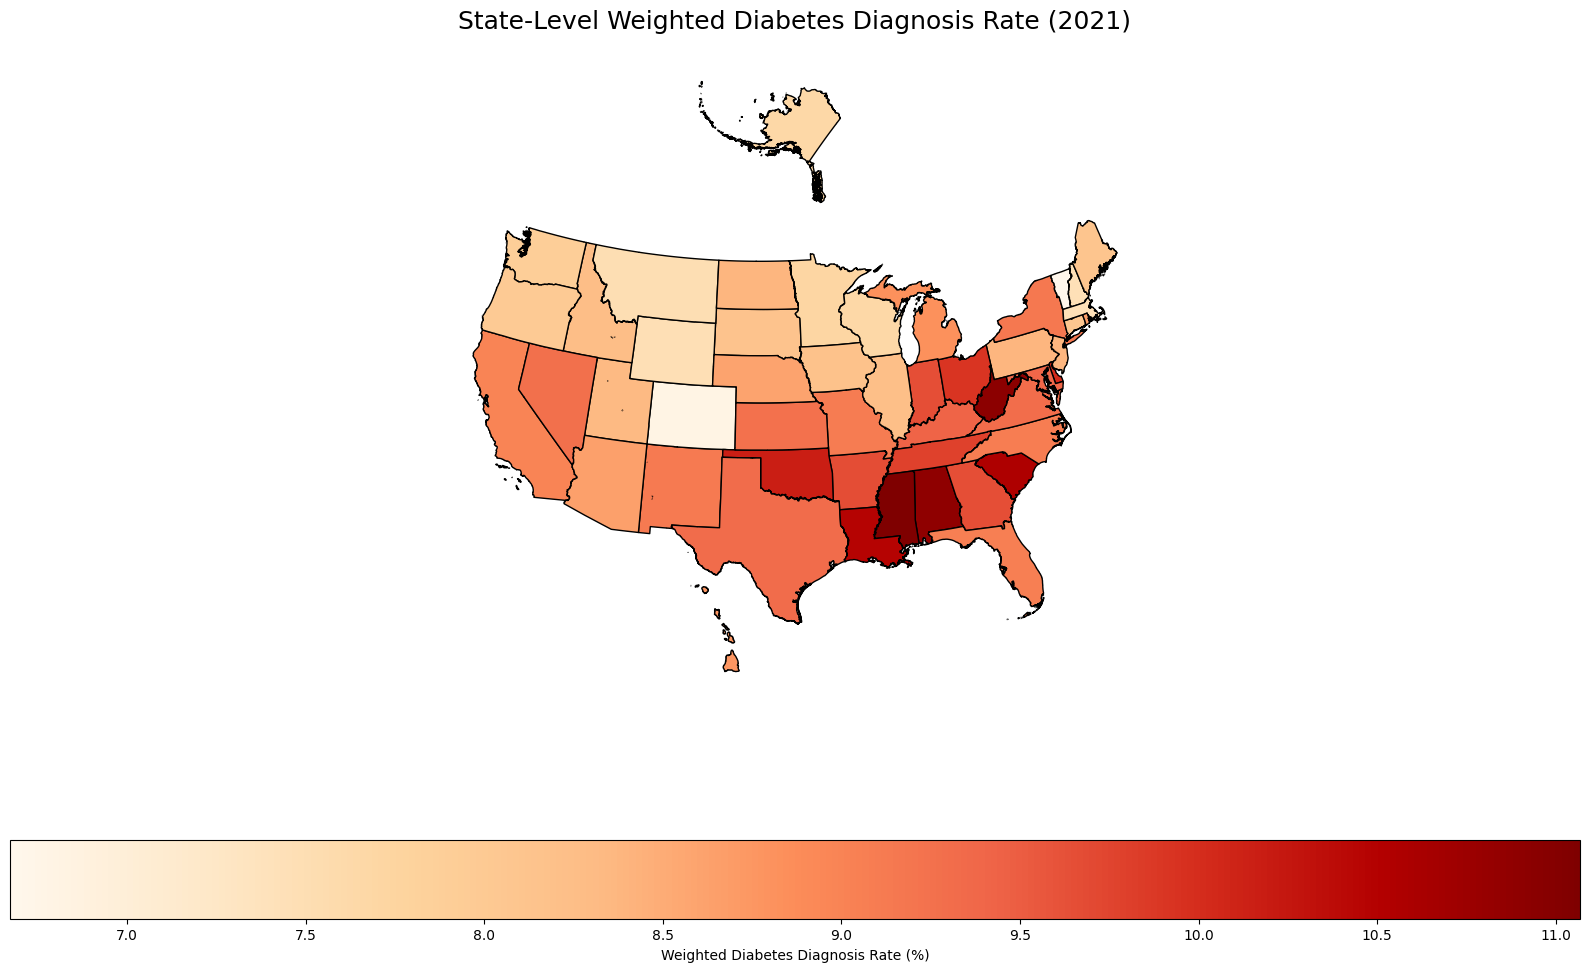

In [630]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load the US state shapefile
gdf_states = gpd.read_file('cb_2022_us_state_500k/cb_2022_us_state_500k.shp')

# Ensure the state_rates DataFrame has USPS codes as the merge key
# Assuming 'State_x' in state_rates is the USPS code (e.g., 'CA', 'NY')
# Merge shapefile with your data using state abbreviation
gdf_states = gdf_states.merge(state_rates, how='left', left_on='STUSPS', right_on='State Abbrev')

# Exclude US territories
gdf_states = gdf_states[~gdf_states['STUSPS'].isin(['PR', 'GU', 'VI', 'MP', 'AS'])]

# Separate and project
alaska = gdf_states[gdf_states['STUSPS'] == 'AK'].copy()
hawaii = gdf_states[gdf_states['STUSPS'] == 'HI'].copy()
continental = gdf_states[~gdf_states['STUSPS'].isin(['AK', 'HI'])].copy()

gdf_states = gdf_states.to_crs("EPSG:2163")
continental = continental.to_crs("EPSG:2163")
alaska = alaska.to_crs("EPSG:2163")
hawaii = hawaii.to_crs("EPSG:2163")

# Scale and move Alaska and Hawaii
alaska.geometry = alaska.geometry.scale(xfact=0.35, yfact=0.35, origin='center')
alaska.geometry = alaska.geometry.translate(xoff=3e6, yoff=-1.4e6)

hawaii.geometry = hawaii.geometry.translate(xoff=5.3e6, yoff=-1.4e6)

# Combine into one GeoDataFrame
adjusted = pd.concat([continental, alaska, hawaii])

# Plot
fig, ax = plt.subplots(figsize=(16, 10))
adjusted.plot(column='WeightedRate', cmap='OrRd', ax=ax, edgecolor='black', legend=True,
              legend_kwds={'label': "Weighted Diabetes Diagnosis Rate (%)", 'orientation': "horizontal"})
plt.title('State-Level Weighted Diabetes Diagnosis Rate (2021)', fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()


In [633]:
state_rates.sort_values('WeightedRate', ascending = False)

# 1) mississippi
# 2) west virginia
# 3) alabama
# Lowest
# 4)Massachusetts
# 5)Colorado
# 6)Vermont


,State_x,WeightedRate,State Abbrev
24,Mississippi,11.068058,MS
48,West Virginia,10.921707,WV
0,Alabama,10.884629,AL
40,South Carolina,10.563006,SC
18,Louisiana,10.471175,LA
36,Oklahoma,10.171484,OK
7,Delaware,10.035857,DE
35,Ohio,9.926414,OH
42,Tennessee,9.796611,TN
3,Arkansas,9.675171,AR
